In [21]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import cv2
import requests
from PIL import Image
import os
import requests
import io
import matplotlib.patches as patches
import re
import torch

In [2]:
#!pip install easyocr
#!pip install protobuf

In [3]:
from transformers import BlipProcessor, BlipForConditionalGeneration
#from transformers import OwlViTProcessor, OwlViTForObjectDetection
#from transformers import CLIPProcessor, CLIPModel

C:\Users\Maria Waheed\anaconda3\envs\llm_2\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [23]:
import easyocr

In [24]:
from transformers import pipeline

In [37]:
#Blip
processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base")

#zero-shot-classifier
model_name = "openai/clip-vit-large-patch14-336"
classifier = pipeline("zero-shot-image-classification", model = model_name)
labels_for_classification =  [["Trees", "Car", "Bus", "Truck", "Motor-Bike", "Van", "Bike", "pothole", "manhole", "police vehicle", "Ambulance vehicle","traffic light","billboard","traffic sign"]]

#easyocr
reader = easyocr.Reader(['en']) # this needs to run only once to load the model into 

#Sentence Transformer model_
#sentence_model = SentenceTransformer('clip-ViT-B-32')

NameError: name 'BlipProcessor' is not defined

In [22]:
#sentence_model = SentenceTransformer("all-MiniLM-L6-v2")

In [9]:
def displayImage(imgI,imgname):
    f = plt.figure()
    f.set_figwidth(12)
    f.set_figheight(9)
    rgb = cv2.cvtColor(imgI, cv2.COLOR_BGR2RGB)
    plt.imshow( rgb  )
    plt.title(imgname)
    plt.show()
def displayImageGrey(imgI,imgname):
    f = plt.figure()
    f.set_figwidth(12)
    f.set_figheight(9)
    plt.imshow( imgI )
    plt.title(imgname)
    plt.show()
def resizeImgToHeight(imgI,reqH=500.0):
    curH = float(imgI.shape[0])
    curW = float(imgI.shape[1])
    woh = curW/curH
    reqW = woh*reqH
    #imgI2 = cv2.resize(imgI[:], (int(reqW),int(reqH)), interpolation=cv2.INTER_AREA)
    #imgI2 = cv2.resize(imgI[:], (int(reqW),int(reqH)), interpolation=cv2.INTER_LINEAR)
    imgI2 = cv2.resize(imgI[:], (int(reqW),int(reqH)), interpolation=cv2.INTER_CUBIC)
    return imgI2

In [10]:
"""
vid = cv2.VideoCapture(0)#2
active=0
while(True):

    ret, img = vid.read()
    
    if img is not None:
        current_time = time.time()
        x=int(img.shape[1]*0.3)
        y=int(img.shape[0]*0.3)
        
        x2=int(img.shape[1]*0.6)
        y2=int(img.shape[0]*0.6)
        
        img = cv2.rectangle(img, (x,y),(x2,y2), (0, 255, 0), 2)
        if(active==0):
            cv2.imshow('frame', img)
            cv2.destroyWindow("frame")


# Release the video capture object
vid.release()

# Destroy all the windows
cv2.destroyAllWindows()
"""

'\nvid = cv2.VideoCapture(0)#2\nactive=0\nwhile(True):\n\n    ret, img = vid.read()\n    \n    if img is not None:\n        current_time = time.time()\n        x=int(img.shape[1]*0.3)\n        y=int(img.shape[0]*0.3)\n        \n        x2=int(img.shape[1]*0.6)\n        y2=int(img.shape[0]*0.6)\n        \n        img = cv2.rectangle(img, (x,y),(x2,y2), (0, 255, 0), 2)\n        if(active==0):\n            cv2.imshow(\'frame\', img)\n            cv2.destroyWindow("frame")\n\n\n# Release the video capture object\nvid.release()\n\n# Destroy all the windows\ncv2.destroyAllWindows()\n'

In [11]:
def blip_image_captioning(raw_image):
    text = "This provided picture dipicts"
    inputs = processor(raw_image, text, return_tensors="pt")
    out = model.generate(**inputs)

    caption_result=processor.decode(out[0], skip_special_tokens=True)
    print(caption_result)

    return caption_result

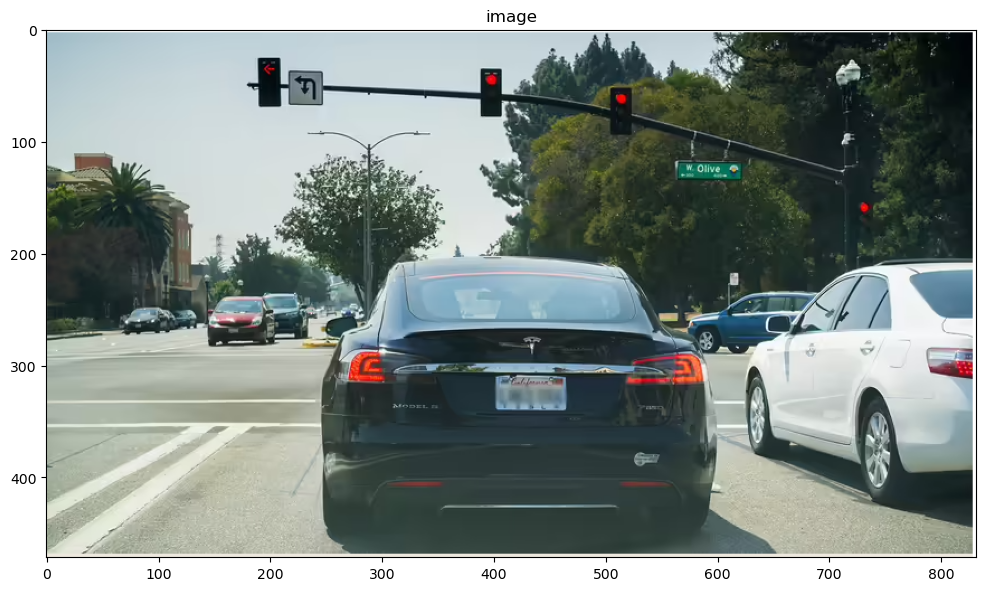

C:\Users\Maria Waheed\anaconda3\envs\llm_2\lib\site-packages\transformers\generation\utils.py:1168: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


this provided picture dipicts the tesla model s
{'score': 0.6403307914733887, 'label': 'traffic light'}
traffic light: 1


{'score': 0.17107687890529633, 'label': 'traffic sign'}
traffic sign: 0


{'score': 0.13046979904174805, 'label': 'Car'}
Car: 0


{'score': 0.03393460437655449, 'label': 'billboard'}
billboard: 0


{'score': 0.008505402132868767, 'label': 'Truck'}
Truck: 0


{'score': 0.004367492627352476, 'label': 'pothole'}
pothole: 0


{'score': 0.0027171524707227945, 'label': 'Bus'}
Bus: 0


{'score': 0.0022152718156576157, 'label': 'police vehicle'}
police vehicle: 0


{'score': 0.0014446109998971224, 'label': 'Motor-Bike'}
Motor-Bike: 0


{'score': 0.0014048705343157053, 'label': 'Bike'}
Bike: 0


{'score': 0.001309102401137352, 'label': 'Ambulance vehicle'}
Ambulance vehicle: 0


{'score': 0.0010341571178287268, 'label': 'Trees'}
Trees: 0


{'score': 0.0009508821531198919, 'label': 'manhole'}
manhole: 0


{'score': 0.00023905640409793705, 'label': 'Van'}
Van: 0


Ollve
--->>

In [12]:
img_url = "D:\\core9_work\\Amir's Land rover AI Enablement\\picture\\Capture.PNG" 
raw_image = Image.open(img_url).convert('RGB')
img = cv2.imread(img_url)
displayImage(img,"image")

caption_result=blip_image_captioning(raw_image)



#Zero Short Image Classification!!
object_list=[]
scores = classifier(img_url,candidate_labels = labels_for_classification)
for i in range(len(scores)):
    print(scores[i])
    print(scores[i]["label"]+str(": ")+str(round(scores[i]["score"])))
    if int(round(scores[i]["score"]))>= int(1):
        #scores[i]["label"]=scores[i]["label"].replace("vehicle", "other vehicle")
        object_list.append(scores[i]["label"])
    print("\n")



result = reader.readtext(img_url)
high_ocr=[]
for i in range(len(result)):
    print(result[i][1])
    if float(result[i][-1])>=0.4:
        print("--->>",result[i][1])
        high_ocr.append(result[i][1])

In [13]:
object_list

['traffic light']

In [14]:
description=f"{caption_result} and the image contains these objects:{object_list} The text extracted from the image are:{high_ocr}"

In [32]:
from langchain.vectorstores import Chroma
from datetime import datetime
from langchain.schema import Document
from langchain_community.embeddings.sentence_transformer import (SentenceTransformerEmbeddings,)
embedding_function = SentenceTransformerEmbeddings(model_name="all-MiniLM-L6-v2")

In [6]:
#!pip install sentence-transformers

In [33]:
#today = datetime.today()

In [34]:
#formatted_date = today.strftime("%Y-%m-%d") 

In [35]:
#formatted_date

In [31]:
#description

In [82]:
#persist_directory = f"./chromadb_data"
#os.makedirs(persist_directory, exist_ok=True)

# Creating a document with text and metadata
doc = Document(
    page_content=str(description),
    metadata={"title": "D:\\core9_work\\Amir's Land rover AI Enablement\\picture\\Capture.PNG", "date": formatted_date}
)

# Convert single document to a list of documents
documents = [doc]

# Accessing the content and metadata
print("Document Content:", doc.page_content)
print("Document Metadata:", doc.metadata)

vectorstore  = Chroma.from_documents(documents, embedding_function,persist_directory=persist_directory)
vectorstore.persist()

print("Documents and embeddings added to ChromaDB successfully.")
print(f"Database is stored in: {persist_directory}")

Document Content: this is not a black hole 
Document Metadata: {'title': "D:\\core9_work\\Amir's Land rover AI Enablement\\picture\\Capture.PNG", 'date': '2024-06-21'}
Documents and embeddings added to ChromaDB successfully.
Database is stored in: ./chromadb_data


In [ ]:
vectorstore_load=Chroma(persist_directory="./chromadb_data", embedding_function=embedding_function)

In [18]:
# query it
answer=""
#query = "Did the picture contains a tesla in it and is of traffic"
query = "Did the picture contains a tesla"
answer = vectorstore_load.similarity_search_with_score(query)


In [13]:
answer

[(Document(page_content="this provided picture dipicts the tesla model s and the image contains these objects:['traffic light'] The text extracted from the image are:['Ollve']", metadata={'date': '2024-06-20', 'title': "D:\\core9_work\\Amir's Land rover AI Enablement\\picture\\Capture.PNG"}),
  0.7800238513479835),
 (Document(page_content='this is not a that green ', metadata={'date': '2024-06-20', 'title': "D:\\core9_work\\Amir's Land rover AI Enablement\\picture\\Capture.PNG"}),
  1.5594034229172358),
 (Document(page_content='this is not a black hole ', metadata={'date': '2024-06-21', 'title': "D:\\core9_work\\Amir's Land rover AI Enablement\\picture\\Capture.PNG"}),
  1.679873261604448),
 (Document(page_content='this is not a black hole ', metadata={'date': '2024-06-21', 'title': "D:\\core9_work\\Amir's Land rover AI Enablement\\picture\\Capture.PNG"}),
  1.679873261604448)]

In [14]:
# Perform a similarity search with metadata filtering
filtered_results = vectorstore_load.similarity_search(query)

In [15]:
filtered_results

[Document(page_content="this provided picture dipicts the tesla model s and the image contains these objects:['traffic light'] The text extracted from the image are:['Ollve']", metadata={'date': '2024-06-20', 'title': "D:\\core9_work\\Amir's Land rover AI Enablement\\picture\\Capture.PNG"}),
 Document(page_content='this is not a that green ', metadata={'date': '2024-06-20', 'title': "D:\\core9_work\\Amir's Land rover AI Enablement\\picture\\Capture.PNG"}),
 Document(page_content='this is not a black hole ', metadata={'date': '2024-06-21', 'title': "D:\\core9_work\\Amir's Land rover AI Enablement\\picture\\Capture.PNG"}),
 Document(page_content='this is not a black hole ', metadata={'date': '2024-06-21', 'title': "D:\\core9_work\\Amir's Land rover AI Enablement\\picture\\Capture.PNG"})]

In [89]:
from langchain.vectorstores.base import VectorStoreRetriever
from langchain.chains import ConversationalRetrievalChain

In [92]:
chroma_retriever = VectorStoreRetriever(vectorstore=vectorstore_load, search_kwargs={"filter":{"date": "2024-06-21"},"k":1},)
retrieved_docs = chroma_retriever.get_relevant_documents(query)
print(len(retrieved_docs))

1


In [93]:
retrieved_docs

[Document(page_content='this is not a black hole ', metadata={'date': '2024-06-21', 'title': "D:\\core9_work\\Amir's Land rover AI Enablement\\picture\\Capture.PNG"})]

In [20]:
answer=""
#query = "Did the picture contains a tesla in it and is of traffic"
query = "Did the picture contains a tesla"
answer = vectorstore_load.similarity_search_with_score(query)

In [36]:
import requests
from PIL import Image
import torch

from transformers import OwlViTProcessor, OwlViTForObjectDetection

processor = OwlViTProcessor.from_pretrained("google/owlvit-base-patch32")
model = OwlViTForObjectDetection.from_pretrained("google/owlvit-base-patch32")

url = "http://images.cocodataset.org/val2017/000000039769.jpg"
image = Image.open(requests.get(url, stream=True).raw)
texts = [["a photo of a cat", "a photo of a dog"]]
inputs = processor(text=texts, images=image, return_tensors="pt")
outputs = model(**inputs)

# Target image sizes (height, width) to rescale box predictions [batch_size, 2]
target_sizes = torch.Tensor([image.size[::-1]])
# Convert outputs (bounding boxes and class logits) to COCO API
results = processor.post_process_object_detection(outputs=outputs, threshold=0.1, target_sizes=target_sizes)

i = 0  # Retrieve predictions for the first image for the corresponding text queries
text = texts[i]
boxes, scores, labels = results[i]["boxes"], results[i]["scores"], results[i]["labels"]

# Print detected objects and rescaled box coordinates
for box, score, label in zip(boxes, scores, labels):
    box = [round(i, 2) for i in box.tolist()]
    print(f"Detected {text[label]} with confidence {round(score.item(), 3)} at location {box}")


Detected a photo of a cat with confidence 0.707 at location [324.97, 20.44, 640.58, 373.29]
Detected a photo of a cat with confidence 0.717 at location [1.46, 55.26, 315.55, 472.17]
